In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.linalg import inv


def Random_Normal_Num():
	random_array = np.array([random.random() for x in range(12)])
	random_num = random_array.sum()-6
	return random_num


def Random_Gauss_Generator(mean, var):
	# Y = (var**1/2) * X + mean
	return (var**(1/2))*Random_Normal_Num() + mean


def Poly_Generator(var, w, phi):
	e = Random_Gauss_Generator(0, var)
	return np.dot(w, phi) + e


def Welford_Online_Algo(x, data_num, pre_mean, pre_var):
    if data_num == 1:
        new_mean = x
        new_var = 0
    else:
        new_mean = pre_mean + (x - pre_mean)/data_num
        new_var = pre_var + ((x - pre_mean)**2)/data_num - pre_var/(data_num-1)
    if data_num>0 and data_num % 1000 == 0:
        print("The",data_num,"th data is :",x)
        print("mean : ", new_mean, "\tvar : ", new_var, "\n")
    return new_mean, new_var


def Gauss_Online_Learning(data_sum, data_num, pri_mean, pri_var, poly_var):
	var_n = 1/pri_var + data_num/poly_var
	mean_n = var_n * (pri_mean/pri_var + data_sum/poly_var)
	print("mean : ", mean_n, "\tvar : ", var_n, "\n")
	return mean_n, var_n


def plot_line(title, x, y, label, color):
	plt.title(title)
	plt.plot(x, y, label=label, color=color)
	plt.legend(loc = "best")
	plt.show()


def x2phi(x, basis):
	return np.array([x**power for power in range(basis)])


def pred_distribution(mu, phi, a, lambda_):
	mu_pred  = np.matmul(phi.T, mu)
	var_pred = (1/a) + np.matmul(np.matmul(phi.T, inv(lambda_)), phi)
	return mu_pred, var_pred


# def plot_ground_truth_line(x, y):
# 	return plt.plot(x, y, color='green', alpha=0.7, label='Truth')

def plot_pred(index, interval, post_mean, phi, a, post_lam, basis, x_, y_, w_ground):
	xs = np.linspace(-10, 10, 100)
	ys_mu = []
	ys_std_up = []
	ys_std_down = []
	ys_ground = []
	for x in xs:
		phi = x2phi(x, basis)
		mu_pred, var_pred = pred_distribution(post_mean, phi, a, post_lam)
		ys_ground.append(np.matmul(w_ground, phi))
		ys_mu.append(mu_pred)
		ys_std_up.append(mu_pred+var_pred)
		ys_std_down.append(mu_pred-var_pred)
	plt.figure((index+1)/interval)
	title = str(index+1) + " Data trained (1/a = " + str("%.5f" % (1/a)) + ")"
	plt.title(title)
	plt.scatter(x_, y_, marker='.', alpha=0.5)  # Mark each y points we have generated
	plt.plot(xs, ys_mu, color = 'red', label='Guess')  # Plot the guessing line
	plt.plot(xs, ys_ground, color='green', alpha=0.7, label='Truth')  # Plot the ground truth line
	# plot_ground_truth_line(xs, ys_ground)  
	plt.fill_between(xs, ys_std_up, ys_std_down, interpolate=True, color='red', alpha=0.2, label='Predict Distribution')  # Plot the possible distribution
	plt.legend(loc='best')


def Estimate_var(index, xs, ys, w, poly_dim):
	var = 0
	for x,y  in zip(xs, ys):
		phi = x2phi(x, poly_dim)
		mean = np.matmul(w, phi)
		var += (y - mean)**2
	return (1/index) * var

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


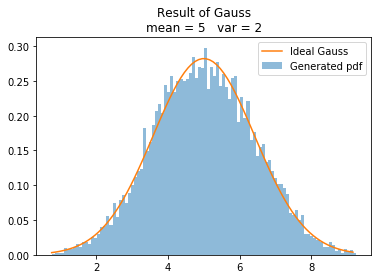

In [2]:
##### hw-1.a #####
##### Gaussian Generator #####
test_num = 10000
Y = []
gaussian_mean = 5
gaussian_var = 2
for i in range(test_num):
	Y.append(Random_Gauss_Generator(gaussian_mean, gaussian_var))

# Plot the hist graph
x_min = gaussian_mean - 3*(gaussian_var**(1/2))
x_max = gaussian_mean + 3*(gaussian_var**(1/2))
plt.title("Result of Gauss\nmean = {}   var = {}".format(gaussian_mean, gaussian_var))
plt.hist(Y, 100, normed=1, alpha=0.5, range=(x_min, x_max), label='Generated pdf')

# Plot the ideal gauss line
x_axis = np.arange(x_min, x_max, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, gaussian_mean, gaussian_var**(1/2)), label='Ideal Gauss')
plt.legend(loc='best')
plt.show()

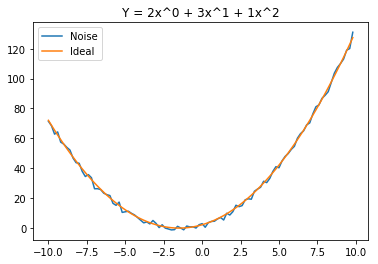

In [4]:
##### hw-1.b #####
##### Ploy Generator #####
test_num = 100
x_range = np.arange(-10, 10, 20/test_num)
w_ground = [2, 3, 1]  # The weight of the ground true line
poly_var = 2  # Variance of a point away from the ground true poly line
poly_dim = len(w_ground)  # The dimension of the ground true poly line

phi = [[x**power for power in range(poly_dim)] for x in x_range]  # The design matrix

# Noise Poly
Y_ideal = []
Y_noise = []
for index in range(test_num):
	Y_noise.append(Poly_Generator(poly_var, w_ground, phi[index]))  # Append the noise point of the line into Y_noise
	Y_ideal.append(Poly_Generator(0, w_ground, phi[index]))
title = "Y = "
for power, coef in enumerate(w_ground):
	title += "{}x^{}".format(coef, power)
	if power < poly_dim-1:
		title += " + "
plt.title(title)
plt.plot(x_range, Y_noise, label="Noise")
plt.plot(x_range, Y_ideal, label="Ideal")
plt.legend(loc='best')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


The 1000 th data is : 5.441146341693989
mean :  4.996934712456983 	var :  1.8600741685992022 

The 2000 th data is : 6.39934465853171
mean :  5.0189165840958285 	var :  1.9448489902556294 

The 3000 th data is : 6.020785607984256
mean :  5.018055389945154 	var :  1.9314232393548105 

The 4000 th data is : 5.585096267204737
mean :  5.031282024376595 	var :  1.9543439964703333 

The 5000 th data is : 6.2323156169570115
mean :  5.0199387764381695 	var :  1.9693388009020165 

The 6000 th data is : 5.271444868439841
mean :  5.0094393627545495 	var :  1.9619707768770989 

The 7000 th data is : 4.967599760011363
mean :  5.009995730112709 	var :  1.9723035431232878 

The 8000 th data is : 3.6137692841199285
mean :  5.008870566724868 	var :  1.968255573619087 

The 9000 th data is : 4.672916313840444
mean :  5.004749181671896 	var :  1.9721781596356813 

The 10000 th data is : 4.553917089387655
mean :  4.999255772522261 	var :  1.969936232953793 

The 11000 th data is : 6.113277737918901
mean :

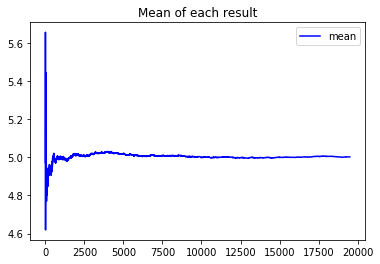

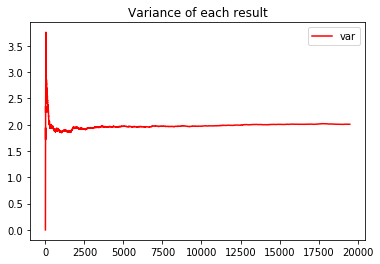

In [5]:
#### hw-2 #####
#### Sequential Estimate #####
x = []
index = 0 # Count the total number of data
num_data_in_batch = 500

min_index = 5000
max_index = 100000
batch_num = 0 # Count the number of batch
batch_mean = np.zeros(num_data_in_batch, dtype=np.float32) # Record each mean of a batch
batch_var = np.zeros(num_data_in_batch, dtype=np.float32) # Record var mean of a batch
batch_m_mean = [] # Record the mean of mean in each batch
batch_m_var = [] # Record the mean of var in each batch

seq_mean = 0 # Count the mean of the online sequence
seq_var = 0 # Count the var of the online sequence
total_mean = [] # Record the mean of each result of online algo
total_var = [] # Record the var of each result of online algo

while(1):
	x = np.append(x, Random_Gauss_Generator(gaussian_mean, gaussian_var))
	seq_mean, seq_var = Welford_Online_Algo(x[index], index, seq_mean, seq_var)
	total_mean.append(seq_mean)  # Append the seq_mean to the total_mean
	total_var.append(seq_var)  # Append the seq_var to the total_var

	# When the index is larger than 10000, it is time to see if it converges
	# Append every mean and var
	if index > min_index:
		batch_mean = np.append(batch_mean, seq_mean)
		batch_var = np.append(batch_var, seq_var)

	#  And then calculate the mean of the (seq_mean, seq_var) when the batch is full (The size of batch = num_data_in_batch) 
	if index > min_index and index%num_data_in_batch == 0 :
		batch_num += 1
		batch_m_mean.append((batch_mean.sum())/num_data_in_batch)
		batch_m_var.append((batch_var.sum())/num_data_in_batch)

		# Compare the last data (mean, var) to the (mean, var) of last two batch
		if batch_num >= 10 and (abs(seq_mean-batch_m_mean[batch_num-1]) < 0.001 and
								abs(seq_var-batch_m_var[batch_num-1]) < 0.001 and
								abs(seq_mean-batch_m_mean[batch_num-2]) < 0.001 and
								abs(seq_var-batch_m_var[batch_num-2]) < 0.001):
			print("----------------------")
			print("The estimation converges. There are ", index, " data trained.", )
			print("----------------------")
			print("The ground mean : ", gaussian_mean)
			print("Converge mean : ", seq_mean)
			print()
			print("The ground var : ", gaussian_var)
			print("Converge var : ", seq_var)
			print("\n")
			break
		else:
			batch_mean = np.zeros(num_data_in_batch, dtype=np.float32)
			batch_var = np.zeros(num_data_in_batch, dtype=np.float32)
	if index >= max_index-1:
		break
	index += 1
index += 1
plot_line("Mean of each result", np.arange(index), total_mean, "mean", "b")
plot_line("Variance of each result", np.arange(index), total_var, "var", "r")

Training...


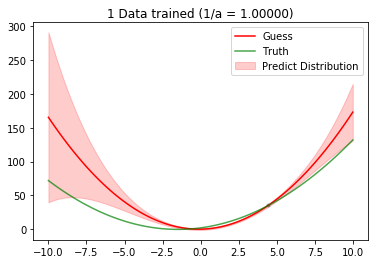

1 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.08679845 0.38337012 1.69326345]

poly_ground_var :  2
poly_pred_var :  1.0





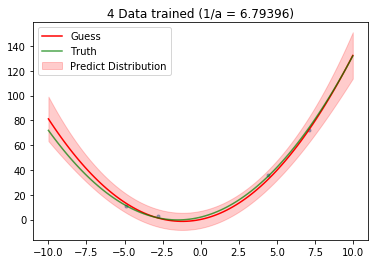

4 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.12786804 2.5594372  1.06734891]

poly_ground_var :  2
poly_pred_var :  6.793964245004148





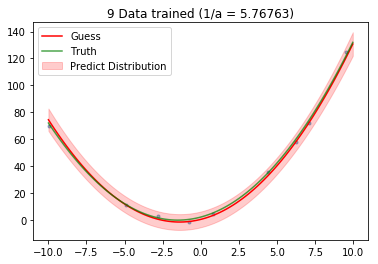

9 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.27186968 2.81551232 1.02322352]

poly_ground_var :  2
poly_pred_var :  5.767629435166736





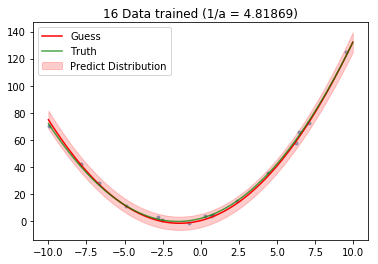

16 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.40193401 2.86184453 1.03100268]

poly_ground_var :  2
poly_pred_var :  4.818692607302429





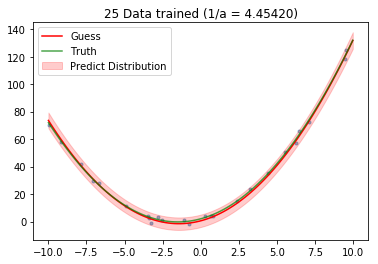

25 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.52476031 2.90588514 1.02154384]

poly_ground_var :  2
poly_pred_var :  4.454196884652963





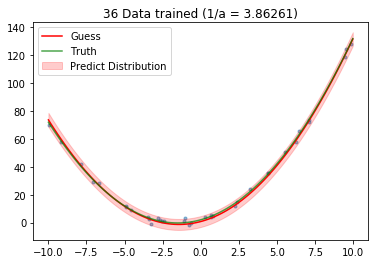

36 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.75125379 2.89795253 1.01922582]

poly_ground_var :  2
poly_pred_var :  3.8626143118379987





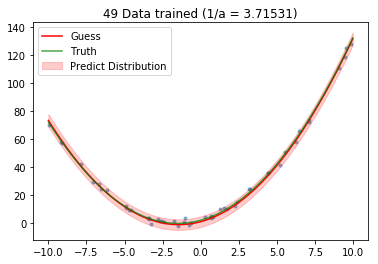

49 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.95530299 2.91597763 1.01391536]

poly_ground_var :  2
poly_pred_var :  3.7153069383801403





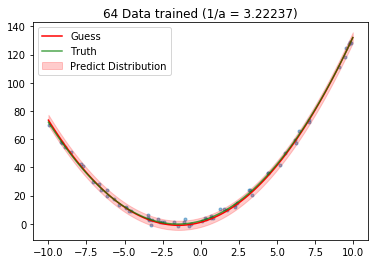

64 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [0.98302461 2.92768266 1.01748102]

poly_ground_var :  2
poly_pred_var :  3.2223746748285444





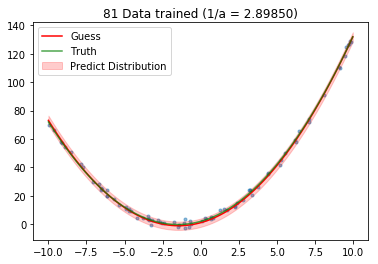

81 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.01945671 2.93879062 1.01491748]

poly_ground_var :  2
poly_pred_var :  2.8984979971847205





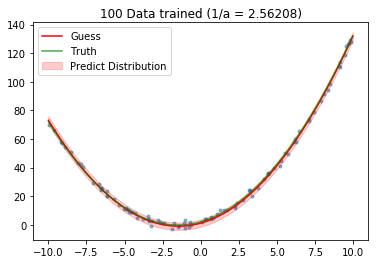

100 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.08248241 2.93725078 1.01340517]

poly_ground_var :  2
poly_pred_var :  2.5620801500248414





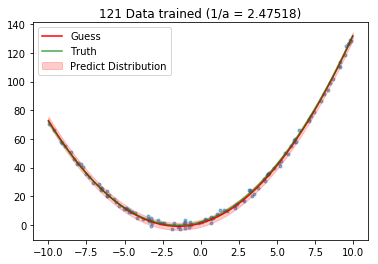

121 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.08229085 2.94437085 1.01208426]

poly_ground_var :  2
poly_pred_var :  2.4751789468149523





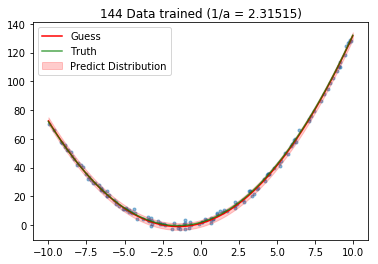

144 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.24574404 2.95564543 1.00775316]

poly_ground_var :  2
poly_pred_var :  2.3151502957778094





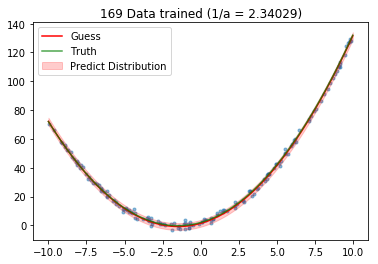

169 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.38078731 2.96909644 1.00481687]

poly_ground_var :  2
poly_pred_var :  2.3402890381305865





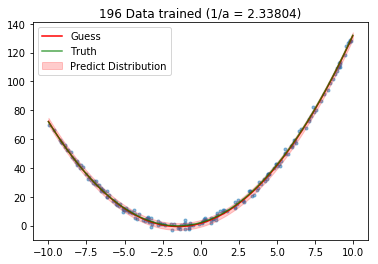

196 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.49754014 2.97105604 1.00455569]

poly_ground_var :  2
poly_pred_var :  2.338035315232057





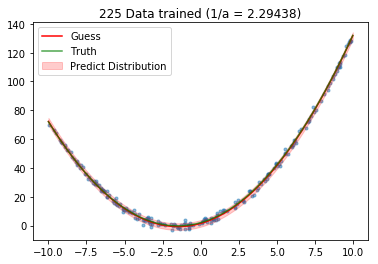

225 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.4537695  2.97546539 1.00577759]

poly_ground_var :  2
poly_pred_var :  2.2943770050839034





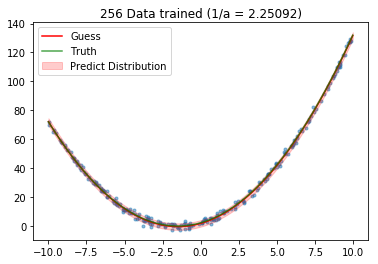

256 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.57734952 2.97925963 1.00291896]

poly_ground_var :  2
poly_pred_var :  2.250923961562545





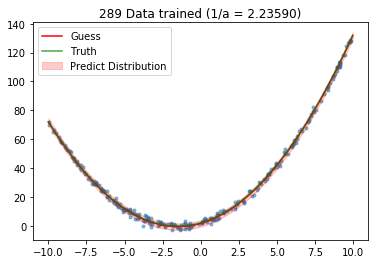

289 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.59223474 2.98692641 1.00305202]

poly_ground_var :  2
poly_pred_var :  2.2358963137615877





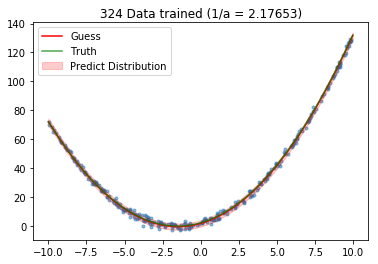

324 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.57590763 2.98356632 1.00340824]

poly_ground_var :  2
poly_pred_var :  2.1765344901885926





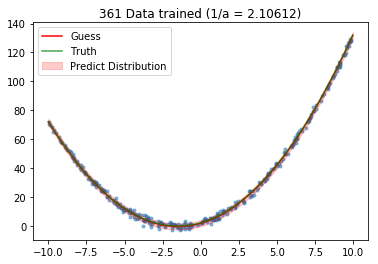

361 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.67046515 2.9891144  1.00248998]

poly_ground_var :  2
poly_pred_var :  2.106123163923813





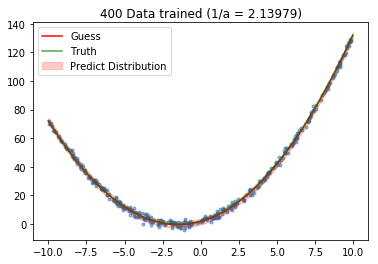

400 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.69069909 2.98680562 1.00333818]

poly_ground_var :  2
poly_pred_var :  2.1397921900014265





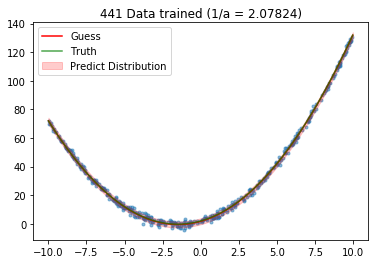

441 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.77681336 2.98868539 1.00173336]

poly_ground_var :  2
poly_pred_var :  2.0782376571694674





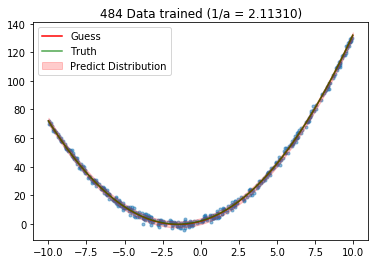

484 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.84319108 2.9913497  1.00120825]

poly_ground_var :  2
poly_pred_var :  2.113096445453166





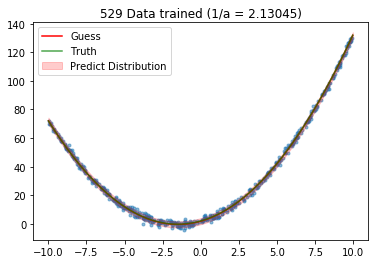

529 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.84848757 2.98794685 1.00123859]

poly_ground_var :  2
poly_pred_var :  2.130447693760374





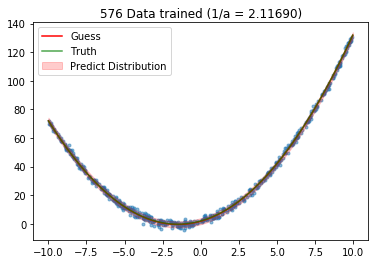

576 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.8281903  2.98844536 1.00119107]

poly_ground_var :  2
poly_pred_var :  2.116898453831113





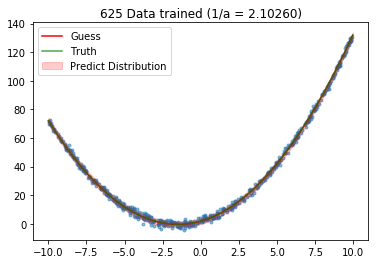

625 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.83314305 2.98898755 1.00114803]

poly_ground_var :  2
poly_pred_var :  2.1025950143229486





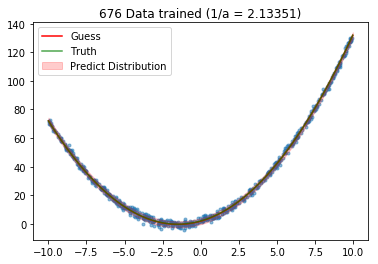

676 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.87870664 2.99009589 1.00089629]

poly_ground_var :  2
poly_pred_var :  2.133508789791643





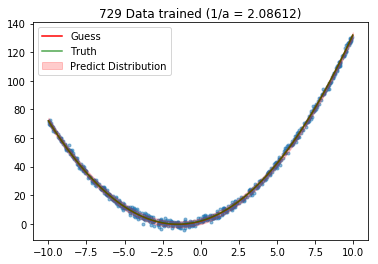

729 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.88362585 2.98984057 1.00057554]

poly_ground_var :  2
poly_pred_var :  2.086124726627003





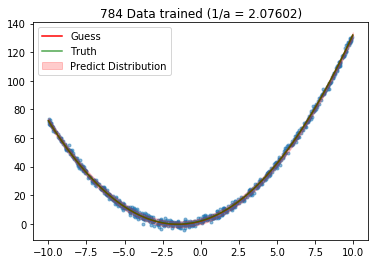

784 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.88657623 2.98840111 1.00055953]

poly_ground_var :  2
poly_pred_var :  2.0760246100306703





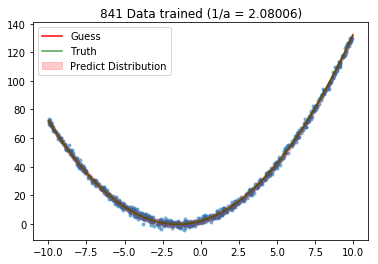

841 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.88659668 2.99424552 1.00108335]

poly_ground_var :  2
poly_pred_var :  2.0800630332975802





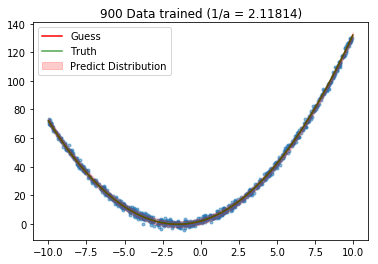

900 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.91433776 2.98972568 1.00074999]

poly_ground_var :  2
poly_pred_var :  2.1181395205568703





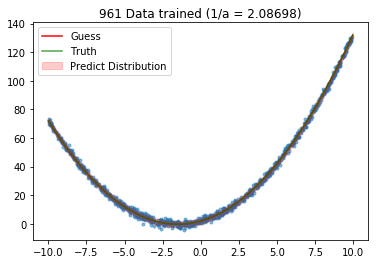

961 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.93815422 2.99091631 1.00015341]

poly_ground_var :  2
poly_pred_var :  2.086979761583336





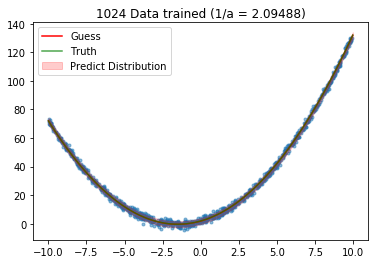

1024 data have been trained...
w_ground :  [2, 3, 1]
w_pred :  [1.9374514  2.99396903 1.00009394]

poly_ground_var :  2
poly_pred_var :  2.094876838993143





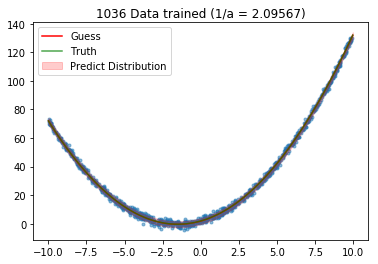

w_ground :  [2, 3, 1]
w_pred :  [1.93867106 2.99546208 0.99999553]

poly_ground_var :  2
poly_pred_var :  2.0956744583119264

----------------------
The estimation converges. There are  1036  data trained.
----------------------


In [6]:
##### hw-3 #####
##### Baysian Linear Regression #####
test_num = 1000
index = 0
pic_num = 5
interval = test_num/pic_num  # Drae a graph every (interval) index
a = 1  # Guess 1/var of each y, we can assume the first a as any number but 0
b = 10  # Guess 1/var of weight

batch_num = 0
num_data_in_batch = 5
batch_var = []
batch_m_var = []

pri_mean = np.array([0.0 for x in range(poly_dim)])
pri_lam = np.identity(poly_dim) * b

x_ = []
y_ = []

print("Training...")
# for index in range(test_num):
while(1):
	x = np.random.uniform(-10, 10, 1)
	phi = x2phi(x, poly_dim)
	y = Poly_Generator(poly_var, w_ground, phi)

	x_ = np.append(x_, x)
	y_ = np.append(y_, y)

	# Calculate posterior
	post_lam = np.array(a*np.matmul(phi, phi.T) + pri_lam)
	post_mean = np.matmul(inv(post_lam), a*np.matmul(phi, y) + np.matmul(pri_lam, pri_mean))

	# Update the new guessing of 1/var 
	if index > 0:
		a = 1/Estimate_var(index, x_, y_, post_mean, poly_dim)
		batch_var = np.append(batch_var, 1/a)
		# print("a : ", a)
		if index % num_data_in_batch == 0:
			# print("sum : ", batch_var.sum())
			batch_m_var = np.append(batch_m_var, batch_var.sum()/num_data_in_batch)
			batch_var = []
			# print("batch_m_var : ", batch_m_var[batch_num])
			if (abs(1/a-batch_m_var[batch_num-1]) < (0.0005*poly_var) and abs(1/a-batch_m_var[batch_num-2]) < (0.0005*poly_var) ):
				break
			batch_num += 1

    # Calculate prior
	pri_lam = post_lam
	pri_mean = post_mean

	if math.sqrt(index+1) - int(math.sqrt(index+1)) == 0:
		plot_pred(index, interval, post_mean, phi, a, post_lam, poly_dim, x_, y_, w_ground)
		plt.show()
		print(index+1, "data have been trained...")
		print("w_ground : ", w_ground)
		print("w_pred : ", post_mean)
		print()
		print("poly_ground_var : ", poly_var)
		print("poly_pred_var : ", 1/a)
		print("\n\n")
	index += 1
    
plot_pred(index, interval, post_mean, phi, a, post_lam, poly_dim, x_, y_, w_ground)
plt.show()
print("w_ground : ", w_ground)
print("w_pred : ", post_mean)
print()
print("poly_ground_var : ", poly_var)
print("poly_pred_var : ", 1/a)
print()
print("----------------------")
print("The estimation converges. There are ", index+1, " data trained.")
print("----------------------")